In [1]:
# analysis_notebook.ipynb

# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

# Save model
import joblib


In [2]:
# Generate synthetic student dataset
np.random.seed(42)
n = 50

df = pd.DataFrame({
    "student_id": range(1, n+1),
    "name": [f"Student_{i}" for i in range(1, n+1)],
    "class": np.random.choice(["A", "B", "C"], n),
    "comprehension": np.random.randint(50, 100, n),
    "attention": np.random.randint(50, 100, n),
    "focus": np.random.randint(50, 100, n),
    "retention": np.random.randint(50, 100, n),
    "assessment_score": np.random.randint(40, 100, n),
    "engagement_time": np.random.randint(20, 120, n)
})

df.head()


,student_id,name,class,comprehension,attention,focus,retention,assessment_score,engagement_time
0,1,Student_1,C,58,74,75,93,42,118
1,2,Student_2,A,75,56,91,73,59,38
2,3,Student_3,C,51,58,62,64,99,67
3,4,Student_4,C,69,73,81,81,98,99
4,5,Student_5,A,77,50,88,81,75,22


In [3]:
# Save dataset to ../data/
df.to_csv("../data/synthetic_students.csv", index=False)
print("Dataset saved to data/synthetic_students.csv")


Dataset saved to data/synthetic_students.csv


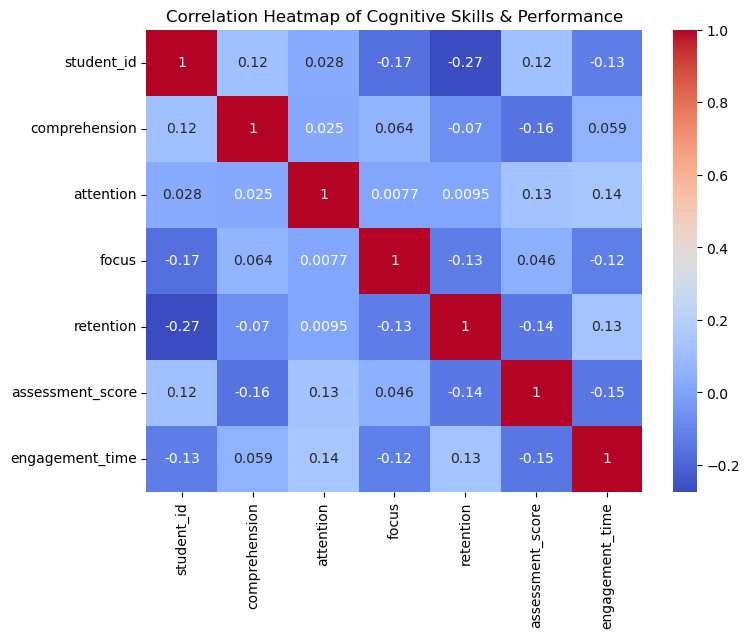

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Cognitive Skills & Performance")
plt.savefig("../plots/correlation_matrix.png")
plt.show()


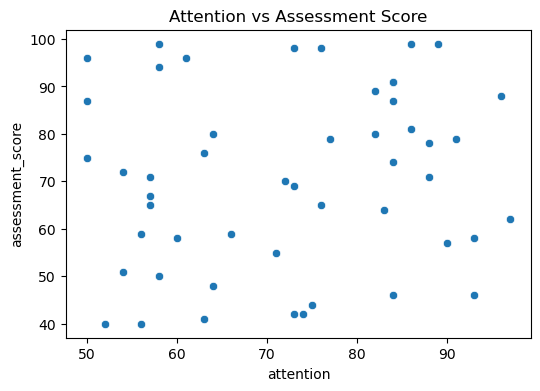

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="attention", y="assessment_score")
plt.title("Attention vs Assessment Score")
plt.savefig("../plots/attention_vs_score.png")
plt.show()


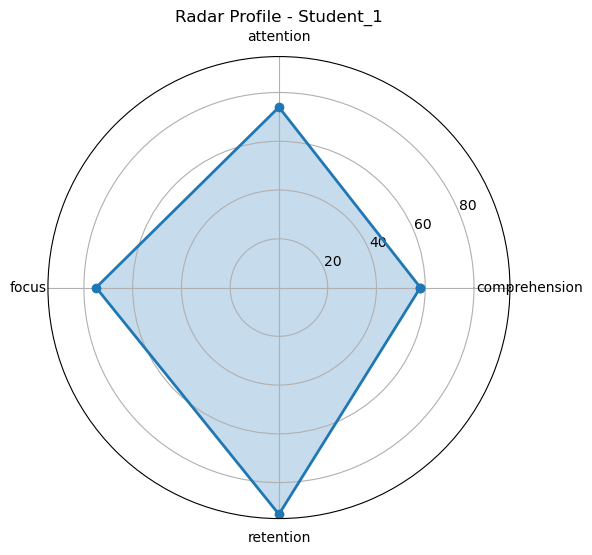

In [6]:
import numpy as np

student = df.iloc[0]
labels = ["comprehension", "attention", "focus", "retention"]
stats = [student[l] for l in labels]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
stats += stats[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, stats, "o-", linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title(f"Radar Profile - {student['name']}")
plt.savefig("../plots/radar_example_student.png")
plt.show()


In [7]:
# Features & Target
X = df[["comprehension", "attention", "focus", "retention", "engagement_time"]]
y = df["assessment_score"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Save model
joblib.dump(reg, "../models/student_score_predictor.pkl")
print("Model saved to models/student_score_predictor.pkl")


MSE: 567.994871902886
R2 Score: -2.4011668976220717
Model saved to models/student_score_predictor.pkl


In [8]:
# Select cognitive skills
features = df[["comprehension", "attention", "focus", "retention"]]

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df["persona_cluster"] = kmeans.fit_predict(features)

df[["name", "persona_cluster"]].head(10)


C:\Users\91905\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,name,persona_cluster
0,Student_1,1
1,Student_2,2
2,Student_3,0
3,Student_4,1
4,Student_5,2
5,Student_6,1
6,Student_7,1
7,Student_8,1
8,Student_9,1
9,Student_10,2
